<a href="https://colab.research.google.com/github/zhengwu123/Machine_learning_group_project/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [5]:
#unzip mnist files
!unzip MNIST.zip



Archive:  MNIST.zip
   creating: MNIST/
  inflating: MNIST/t10k-images-idx3-ubyte.gz  
 extracting: MNIST/t10k-labels-idx1-ubyte.gz  
  inflating: MNIST/train-images-idx3-ubyte.gz  
 extracting: MNIST/train-labels-idx1-ubyte.gz  


In [0]:
# unzip gz files
!gunzip MNIST/t*-ubyte.gz

In [0]:
#
# MNIST Data Loader Class used to load MNIST DATA
#
import numpy as np 
import struct
from array import array
from os.path  import join


class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test) 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Conv3D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model,Sequential

In [0]:
# reading data
training_images_filepath = 'MNIST/train-images-idx3-ubyte'
training_labels_filepath = 'MNIST/train-labels-idx1-ubyte'
test_images_filepath = 'MNIST/t10k-images-idx3-ubyte'
test_labels_filepath = 'MNIST/t10k-labels-idx1-ubyte'
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) =mnist_dataloader.load_data()


In [10]:
#DATA is 2d for CNN to need 3d data, expand 1 dimension at the last col
x_train = np.expand_dims(x_train, -1)
y_train = np.expand_dims(y_train, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [11]:
# print # of class labels
k  = len(set(map(tuple,y_train)))
print(k)


10


In [12]:
# CNN approach one, designed according to the requirement of hw8
model = Sequential()


#add conv1
model.add(Conv2D(4,(3,3),activation='relu',strides=1,padding="VALID", input_shape=(28,28,1)))
#add pool1
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#add conv2
model.add(Conv2D(2, (3, 3),strides=(3,3),activation='relu',padding="VALID"))
#add pool2
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

r = model.fit(x_train,y_train,batch_size=100,epochs=50)

Epoch 1/50
600/600 [==============================] - 1s 2ms/step - loss: 10.9091 - accuracy: 0.0922
Epoch 2/50
600/600 [==============================] - 1s 2ms/step - loss: 2.3196 - accuracy: 0.1113
Epoch 3/50
600/600 [==============================] - 1s 2ms/step - loss: 2.3058 - accuracy: 0.1113
Epoch 4/50
600/600 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.1119
Epoch 5/50
600/600 [==============================] - 1s 2ms/step - loss: 2.3019 - accuracy: 0.1122
Epoch 6/50
600/600 [==============================] - 1s 2ms/step - loss: 2.3016 - accuracy: 0.1123
Epoch 7/50
600/600 [==============================] - 1s 2ms/step - loss: 2.3014 - accuracy: 0.1126
Epoch 8/50
600/600 [==============================] - 1s 2ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 9/50
600/600 [==============================] - 1s 2ms/step - loss: 2.3013 - accuracy: 0.1126
Epoch 10/50
600/600 [==============================] - 1s 2ms/step - loss: 2.3013 - accuracy: 0.112

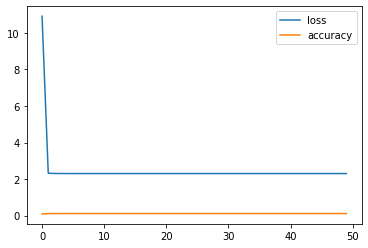

In [13]:
# plot loss per iteration

plt.plot(r.history['loss'],label ='loss')

plt.legend()
# plot accuracy per iteration
plt.plot(r.history['accuracy'],label ='accuracy')

plt.legend()

In [180]:
# CNN approach two, this approach didn't use any pooling just 3 Conv2D 
#layers using strides achieve high accuracy level with just 1 epoch

i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x= Flatten()(x)
x = Dense(512,activation='relu')(x)
x = Dense(k,activation='softmax')(x)
model = Model(i,x)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

r = model.fit(x_train,y_train,batch_size=100,epochs=5)

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 0.2512 - accuracy: 0.9368
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0609 - accuracy: 0.9815
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0384 - accuracy: 0.9877
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0354 - accuracy: 0.9888
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0270 - accuracy: 0.9916


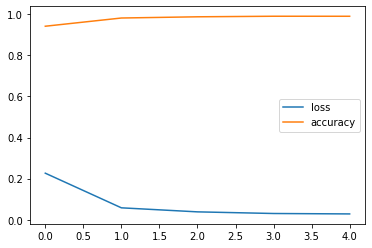

In [0]:
# plot loss per iteration

plt.plot(r.history['loss'],label ='loss')

plt.legend()
# plot accuracy per iteration
plt.plot(r.history['accuracy'],label ='accuracy')

plt.legend()